<a href="https://colab.research.google.com/github/ZackAkil/optimising-basketball/blob/master/Eager_optimising_basketball_shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse is my basketbal shot

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()

In [0]:
# download my basketball shot data
!wget https://github.com/ZackAkil/optimising-basketball/raw/master/my_shot.npy

In [0]:
# load in data
shot_data = np.load('my_shot.npy')

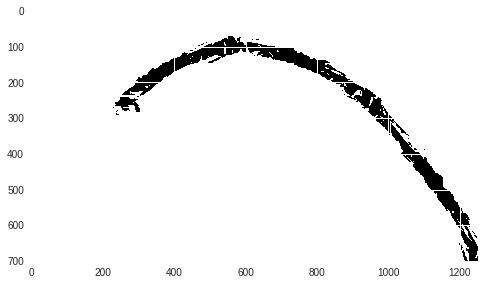

In [5]:
# view data
plt.imshow(shot_data)

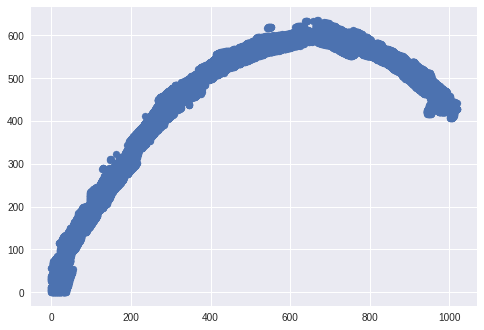

In [6]:
# convert pixels to data points, flip vertically and horizontally 
y, x = np.where(shot_data[::-1, ::-1])

# display
plt.scatter(x,y)

# Define Tensorflow Model

### The varibles that TensorFlow will change

In [0]:
angle_variable = tf.Variable(40.0, name='angle_constant')
force_variable = tf.Variable(50.0, name='force_constant')

my_variables = [angle_variable, force_variable]

### The formula 

http://www.softschools.com/formulas/physics/trajectory_formula/162/

 <img src="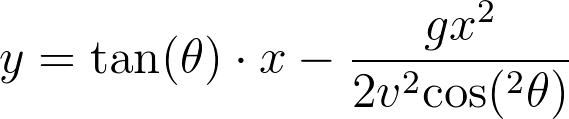
">

In [0]:
def deg2rad(deg):
    pi_on_180 = 0.017453292519943295
    return deg * pi_on_180

def run_model(x):
  tf_lhs = x * tf.tan(deg2rad(angle_variable))
  tf_rhs_top = 9.8 * x ** 2
  tf_rhs_bottom = (2*(force_variable)**2) * (tf.cos( deg2rad(angle_variable))**2)
  output = tf_lhs - (tf_rhs_top / tf_rhs_bottom)
  return output

### What does the model look like with the default values compaired to our data?




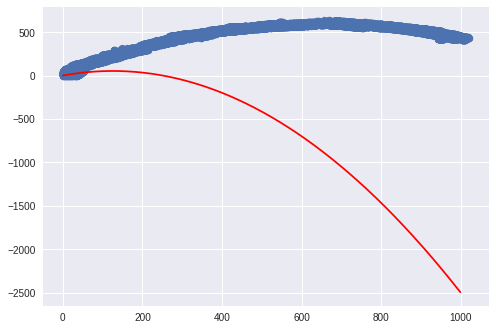

In [9]:
plt.scatter(x, y)
plt.plot(np.arange(1000), run_model(np.arange(1000)),c='r')
plt.show()

In [0]:
optimiser = tf.train.AdamOptimizer(learning_rate=1)

In [35]:
for i in range(20):

  with tf.GradientTape() as tape:
    loss = tf.losses.mean_squared_error(y, run_model(x))

  grads = tape.gradient(loss, my_variables)
  optimiser.apply_gradients(zip(grads, my_variables))

  # print values every 5 loops
  if (i % 5) == 0:
    print(my_variables[0].numpy() , my_variables[1].numpy())

61.91776 122.276566
61.9285 122.3673
61.93763 122.451866
61.945335 122.53063


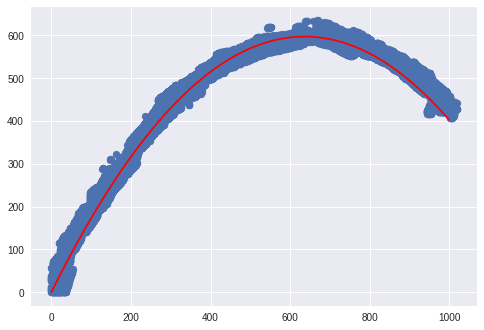

In [36]:
plt.scatter(x, y)
plt.plot(np.arange(1000), run_model(np.arange(1000)),c='r')
plt.show()